# Preparación de los datos

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import datetime
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Para que no se desplieguen las advertencias
warnings.filterwarnings("ignore")

Cultivos con los que trabaja la Red BAMX.

In [3]:
# Cultivos de interés
CULTIVOS = ['Tomate rojo (jitomate)', 'Chile verde', 'Limón', 'Pepino', 'Plátano', 'Mango', 'Garbanzo', 'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Calabacita', 'Lechuga',
            'Tomate verde', 'Espárrago', 'Frambuesa', 'Nopalitos', 'Nuez', 'Fresa', 'Toronja (pomelo)', 'Zarzamora', 'Piña', 'Coliflor', 'Frijol', 'Berenjena', 'Uva', 'Guayaba',
            'Naranja', 'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno']

# Cantidad de cultivos
print(f"Cantidad de cultivos de interés: {len(CULTIVOS)}")

Cantidad de cultivos de interés: 33


## Cargar datos

### SIAP

In [5]:
# URL al archivo parquet en el repositorio
url_siap = r'/Users/luiser/Downloads/Proyecto_Ing_Caract-main 3/Primera_parte/Tidy/SIAP.parquet'
# Cargar archivo parquet como DataFrame
df_siap = pd.read_parquet(url_siap)
# Inspeccionar primeros elementos del DataFrame
df_siap.head()

Entidad       Municipio Superficie Sembrada  \
0       Aguascalientes  Aguascalientes                8.00   
1  Baja California Sur          La Paz                3.00   
2               Colima      Manzanillo               86.29   
3              Durango         Durango               13.00   
4              Durango       Mezquital              110.00   

  Superficie Cosechada  Superficie Siniestrada Produccion Rendimiento  Anio  \
0                 0.00                     0.0       0.00           0  2023   
1                 0.00                     0.0       0.00           0  2023   
2                 0.00                     0.0       0.00           0  2023   
3                 0.00                     0.0       0.00           0  2023   
4                 0.00                     0.0       0.00           0  2023   

     Mes Cultivo  
0  Enero   Agave  
1  Enero   Agave  
2  Enero   Agave  
3  Enero   Agave  
4  Enero   Agave

In [6]:
# Cambiar nombre de columna "Anio" a "Año"
df_siap = df_siap.rename(columns={"Anio":"Año"})

##### Aplicar filtros

In [7]:
# Filtrar años del 2020 en adelante
df_siap = df_siap[df_siap['Año'] >= 2020]

In [8]:
# Filtrar cultivos de interés
df_siap = df_siap[df_siap['Cultivo'].isin(CULTIVOS)]

##### Dimensiones de los datos

In [9]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_siap.shape}\n")

Dimensión de los datos: (387646, 10)



##### Tipos de datos

In [10]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada        object
Superficie Cosechada       object
Superficie Siniestrada    float64
Produccion                 object
Rendimiento                object
Año                         int64
Mes                        object
Cultivo                    object
dtype: object



Notamos que las variables *Superficie Sembrada*, *Superficie Cosechada*, *Producción* y *Rendimiento* son de tipo **object**, pese a que su valor es numérico

Convertimos estas variables object a flotantes

In [11]:
# Lista de variables a convertir
obj_to_float_var = ['Superficie Sembrada', 'Superficie Cosechada', 'Produccion', 'Rendimiento']

# Eliminación de ',' character y conversión a flotante
for var in obj_to_float_var:
    df_siap[var] = df_siap[var].str.replace(',','').astype('float')

# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada       float64
Superficie Cosechada      float64
Superficie Siniestrada    float64
Produccion                float64
Rendimiento               float64
Año                         int64
Mes                        object
Cultivo                    object
dtype: object



##### Valores faltantes

In [12]:
# Valores faltantes
print(f"Valores faltantes:\n {df_siap.isna().sum()}")

Valores faltantes:
 Entidad                   0
Municipio                 0
Superficie Sembrada       0
Superficie Cosechada      0
Superficie Siniestrada    0
Produccion                0
Rendimiento               0
Año                       0
Mes                       0
Cultivo                   0
dtype: int64


Definición de constantes

In [13]:
# Orden cronológico de los meses
MESES_CRONOLOGICO = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Lista de colores para cada año
COLORES = ['#ffd343', '#42ff75', '#426eff', '#ff42cc']

# Lista de cultivos únicos
CULTIVOS_UNICOS = list(df_siap['Cultivo'].unique())

# Lista de años únicos
AÑOS_UNICOS = list(df_siap['Año'].unique())

# Lista de estado únicos
ESTADOS_UNICOS = list(df_siap['Entidad'].unique())

### SNIIM

In [14]:
# Path al archivo parquet
url_sniim = r'/Users/luiser/Downloads/Proyecto_Ing_Caract-main 3/Primera_parte/Tidy/SNIIM.parquet'
# Cargar archivo parquet como DataFrame
df_sniim = pd.read_parquet(url_sniim)
# Inspeccionar primeros elementos del DataFrame
df_sniim.sample(n=5)

Fecha       Presentacion            Origen  \
272895  23/10/2020     Caja de 12 kg.         Michoacán   
235694  14/07/2020          Kilogramo  Distrito Federal   
99125   19/02/2020  Arpilla de 22 kg.       Importación   
504900  13/12/2018          Kilogramo        Nuevo León   
657013  30/01/2020          Kilogramo           Chiapas   

                                                  Destino  Precio Minimo  \
272895                México: Central de Abasto de Toluca           8.33   
235694  Campeche: Mercado "Pedro Sáinz de Baranda", Ca...          30.00   
99125   Baja California : Central de Abasto INDIA, Tij...          16.36   
504900  Coahuila: Central de Abasto de La Laguna, Torreón           9.00   
657013  Coahuila: Central de Abasto de La Laguna, Torreón          14.00   

        Precio Maximo  Precio Frecuente Observacion  \
272895          10.00              9.17         nan   
235694          35.00             35.00         nan   
99125           16.36             16.36         nan   
504900          10.00             10.00         nan   
657013          15.00             14.50         nan   

                             Cultivo  
272895  ciruela huesuda roja_primera  
235694         chile poblano_primera  
99125    cebolla bola grande_primera  
504900             mandarina_primera  
657013        papaya maradol_primera

Los valores de precio están estandarizados a KG y por ende las columnas "Presentacion" y "Observacion" son remanentes que podemos eliminar

In [15]:
# Descartamos columnas Presentacion y Observacion
df_sniim = df_sniim.drop(['Presentacion', 'Observacion'], axis=1)

##### Dimensiones de los datos

In [16]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim.shape}")

Dimensión de los datos: (900763, 7)


##### Tipos de datos

In [17]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha                object
Origen               object
Destino              object
Precio Minimo       float64
Precio Maximo       float64
Precio Frecuente    float64
Cultivo              object
dtype: object



Notamos que la variable *Fecha* es de tipo **object**, por lo que la convertimos a **datetime** para facilitar futuros análisis

In [18]:
# Efectuar conversión especificando el formato específico de la fecha
df_sniim['Fecha'] = pd.to_datetime(df_sniim['Fecha'], format="%d/%m/%Y")
# Inspeccionar nuevamente el tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha               datetime64[ns]
Origen                      object
Destino                     object
Precio Minimo              float64
Precio Maximo              float64
Precio Frecuente           float64
Cultivo                     object
dtype: object



##### Aplicar filtros

In [19]:
#Filtramos nuestro DataFrame solo para los años 2020 - 2023 
df_sniim = df_sniim[df_sniim['Fecha'].dt.year >= 2020]

Nota: a causa de la diferencia en el nombre de los cultivos entre los DataFrames, el filtrado con los cultivos de interés de la Red BAMX se dejará para más adelante

##### Valores faltantes

In [20]:
# Valores faltantes
print(f"Valores faltantes:\n {df_sniim.isna().sum()}")

Valores faltantes:
 Fecha               0
Origen              0
Destino             0
Precio Minimo       0
Precio Maximo       0
Precio Frecuente    0
Cultivo             0
dtype: int64


## Juntar DataFrames

Antes de poder juntar los DataFrames es necesario realizar ciertos pasos para homologar los datos:

- Ajustar los nombres de los estados de Origen en los datos del SNIIM
- Ajustar los nombres de los cultivos del SNIIM
- Promediar los precios del SNIIM de manera mensual
- Calcular los valores del SIAP de manera mensual

Debido a su incompatibilidad, se descartarán las columnas de *Municipio* y *Destino*, del SIAP y SNIIM, respectivamente. No obstante, estas columnas en los DataFrames originales serán utilizadas en análisis posteriores.

In [21]:
# Eliminar columna 'Destino'
df_sniim_dest = df_sniim.drop('Destino', axis=1)

# Eliminar columna 'Municipio'
df_siap_mun = df_siap.drop('Municipio', axis=1)


# En ambos casos es necesario sumar los valores numericos que coincidad en Estado, Año, Mes y Cultivo 
df_sniim_dest = df_sniim_dest.groupby(['Fecha', 'Origen', 'Cultivo'])[['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']].sum().reset_index()
df_siap_mun = df_siap_mun.groupby(['Año', 'Mes', 'Entidad', 'Cultivo'])[['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Produccion', 'Rendimiento']].sum().reset_index()

##### Ajustar los nombres de los estados de Origen

In [22]:
# Evaluamos qué nombres de estado en el sniim no están en el siap
print('Estados del SNIIM no presentes en el SIAP:\n')
for estado_sniim in df_sniim_dest['Origen'].unique():
    if estado_sniim not in df_siap_mun['Entidad'].unique():
        print(estado_sniim)

Estados del SNIIM no presentes en el SIAP:

Distrito Federal
Importación
Nacional


Reemplazamos "Distrito Federal" por "Ciudad de México" tal como viene en el SIAP. Descartamos las filas con datos "Importación" y "Nacional"

In [23]:
# Creamos una copia del DataFrame
df_sniim_dest_orig = df_sniim_dest.copy()

# Reemplazamos Distrito Federal por Ciudad de México
condicion = df_sniim_dest['Origen'] == "Distrito Federal"
df_sniim_dest_orig.loc[condicion, 'Origen'] = 'Ciudad de México' 

# Descartamos la filas cuyo valor en la columna "Origen" es Importación o Nacional
df_sniim_dest_orig = df_sniim_dest_orig[(df_sniim_dest_orig['Origen'] != 'Importación') | (df_sniim_dest_orig['Origen'] != 'Nacional')]

##### Ajustar los nombres de los cultivos del SNIIM

Para esto debemos tomar como referencia la lista de cultivos ofrecida por el experto de la red BAMX.

In [24]:
# Inspeccionamos nuevamente algunos elementos de la lista de cultivos
CULTIVOS[:10]

['Tomate rojo (jitomate)',
 'Chile verde',
 'Limón',
 'Pepino',
 'Plátano',
 'Mango',
 'Garbanzo',
 'Brócoli',
 'Cebolla',
 'Sandía']

Ahora inspeccionamos los cultivos de los datos del SNIIM.

In [25]:
# Inspeccionar algunos nombres de cultivos
df_sniim_dest_orig['Cultivo'].sample(n=10)

153382                 cacahuate_primera
410206                      caña_primera
182104            aguacate pagua_primera
199700                 chile cat_primera
220247            sandía sangría_primera
403396            chile guajillo_primera
398904                     ejote_primera
140280    lechuga orejona grande_primera
193483                 mandarina_primera
277872              nuez_western_primera
Name: Cultivo, dtype: object

El formato consiste en el nombre de los cultivos seguido por una descripción de la variedad.
Debido a que en el SIAP no se maneja variedad, para poder homologar los datos nos quedamos solamente con el nombre de los cultivos. No obstante, esto aplica solo para los cultivos cuyo nombre consiste en una sola palabra. Para los nombres con más palabras utilizamos un abordaje manual. 

In [26]:
# Nombres de cultivo con más de una palabra
[cultivo for cultivo in CULTIVOS if len(cultivo.split(' ')) > 1]

['Tomate rojo (jitomate)', 'Chile verde', 'Tomate verde', 'Toronja (pomelo)']

In [27]:
# Creamos una copia del DataFrame
df_sniim_dest_orig_cult = df_sniim_dest_orig.copy()

# Creamos una nueva columna en nuestro DataFrame para almacenar los nuevos nombres de los cultivos
df_sniim_dest_orig_cult['Cultivo SIAP'] = df_sniim_dest_orig_cult['Cultivo']

# Tomate rojo (jitomate): reemplazamos los cultivos "tomate bola_primera" y "tomate saladette_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['tomate bola_primera', 'tomate saladette_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Tomate rojo (jitomate)'

# Tomate verde: reemplazamos el cultivo "tomate verde_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'] == 'tomate verde_primera'

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Tomate verde'

# Toronja (pomelo): reemplazamos el cultivo "toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera" y "toronja rosada_primera"

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(["toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera", "toronja rosada_primera"])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Toronja (pomelo)'

# Chile verde: reemplazamos el cultivo 'chile anaheim_primera', 'chile california_primera', 'chile chilaca_primera', 'chile serrano_primera', 'chile poblano_primera', 'chile jalapeño_primera' y 'chile habanero_primera'

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['chile anaheim_primera', 'chile california_primera', 'chile chilaca_primera', 'chile serrano_primera', 'chile poblano_primera',
                                       'chile jalapeño_primera', 'chile habanero_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Chile verde'

# Nopalitos: en el SNIIM vienen solamente como Nopal

# Seleccionar filas que cumplan con la condición
condicion = df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['nopal grande_primera', 'nopal_primera'])

# Modificar los valores en esas filas
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = 'Nopalitos'

Podemos automatizar el ajuste de los nombres de cultivo con una sola palabra utilizando expresiones regulares

In [28]:
# Condición para ignorar los cultivos que ya modificamos
condicion = ~df_sniim_dest_orig_cult['Cultivo SIAP'].isin(['Tomate rojo (jitomate)', 'Tomate verde', 'Toronja (pomelo)', 'Nopalitos', 'Chile verde'])

# Expresión regular para capturar la primera palabra
pattern = r'^([^\W_]+)'

# Aplicar la expresión regular para mantener solo la primera palabra
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = df_sniim_dest_orig_cult[condicion]['Cultivo SIAP'].str.extract(pattern).values

# Reemplazar la primera letra por mayúscula
df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'] = df_sniim_dest_orig_cult.loc[condicion, 'Cultivo SIAP'].str.title()

# Inspeccionar nuevamente algunos nombres de cultivos
df_sniim_dest_orig_cult['Cultivo SIAP'].sample(n=10)

116488      Chile
121240      Limón
107747     Rábano
103535    Naranja
211480       Caña
342168       Apio
189055    Plátano
235788       Nuez
20520        Lima
165582    Cebolla
Name: Cultivo SIAP, dtype: object

Utilizamos nuevamente la lista de cultivos para filtrar el DataFrame

In [29]:
# Filtramos el DataFrame para quedarnos solo con los cultivos de interés
df_sniim_dest_orig_cult = df_sniim_dest_orig_cult[df_sniim_dest_orig_cult['Cultivo SIAP'].isin(CULTIVOS)]

# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim_dest_orig_cult.shape}")

# Inspeccionamos el DataFrame
df_sniim_dest_orig_cult.sample(n=5)

Dimensión de los datos: (252920, 7)


Fecha    Origen                        Cultivo  Precio Minimo  \
425781 2023-08-30  Veracruz             piña chica_primera          22.00   
36168  2020-04-08    Puebla    calabacita italiana_primera          22.20   
205641 2021-11-16   Nayarit  nuez cáscara de papel_primera         326.00   
209233 2021-11-26   Jalisco        coliflor grande_primera          84.50   
154198 2021-06-14   Jalisco             pera ángel_primera          29.44   

        Precio Maximo  Precio Frecuente Cultivo SIAP  
425781          24.00             24.00         Piña  
36168           30.80             24.20   Calabacita  
205641         330.00            328.00         Nuez  
209233          93.50             92.50     Coliflor  
154198          43.89             38.33         Pera

Debido a la manipulación que realizamos con los cultivos del SNIIM para homologarlos con los del SIAP, es posible que un mismo cultivo presente distintos precios para una misma fecha. Para abordar esto, identificamos los casos en los que estos sucede y promediamos los precios asociados a una misma fecha.

##### Promedio mensual de precios SNIIM

In [30]:
# Desglosar la columna Fecha en dos columnas adicionales para el año y el mes
df_sniim_dest_orig_cult['Año'] = df_sniim_dest_orig_cult['Fecha'].dt.year
df_sniim_dest_orig_cult['Mes'] = df_sniim_dest_orig_cult['Fecha'].dt.month

# Agrupar por Año, Mes, Origen, Destino y Cultivo SIAP, y calcular el promedio de los precios
df_sniim_dest_orig_cult_mens = df_sniim_dest_orig_cult.groupby(['Año', 'Mes', 'Origen', 'Cultivo SIAP'])[['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']].mean().reset_index()

# Diccionario para mapear números de mes a nombres de mes
meses_dict = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Aplicar el mapeo a la columna 'Mes'
df_sniim_dest_orig_cult_mens['Mes'] = df_sniim_dest_orig_cult_mens['Mes'].map(meses_dict)

# DataFrame resultante
df_sniim_dest_orig_cult_mens

Año      Mes          Origen  Cultivo SIAP  Precio Minimo  \
0     2020    Enero  Aguascalientes       Brócoli      11.181818   
1     2020    Enero  Aguascalientes    Calabacita      17.657846   
2     2020    Enero  Aguascalientes      Coliflor      12.045455   
3     2020    Enero  Aguascalientes       Guayaba       8.750000   
4     2020    Enero  Aguascalientes       Lechuga       5.363636   
...    ...      ...             ...           ...            ...   
8905  2023  Octubre       Zacatecas       Cebolla      30.000000   
8906  2023  Octubre       Zacatecas   Chile verde      26.988235   
8907  2023  Octubre       Zacatecas       Lechuga      12.882353   
8908  2023  Octubre       Zacatecas  Tomate verde       9.777778   
8909  2023  Octubre       Zacatecas           Uva      23.333333   

      Precio Maximo  Precio Frecuente  
0         13.181818         12.181818  
1         18.956615         18.454923  
2         14.045455         13.045455  
3          9.584091          9.165909  
4          7.363636          6.363636  
...             ...               ...  
8905      38.000000         38.000000  
8906      31.576471         29.564706  
8907      12.882353         12.882353  
8908      12.666667         11.500000  
8909      27.333333         25.666667  

[8910 rows x 7 columns]

##### Obtención de producción mensual

Por defecto, el SIAP arroja los datos numéricos (Superficie Sembrada, Superficie Cosechada, Superficie Siniestrada, Produccion, Rendimiento) de manera acumulativa. Esto implica que los valores de, por ejemplo Febrero, son los valores de Enero más los de Febrero; los valores de Marzo son los valores de Enero, más los de Febrero, más los de Marzo; y así sucesivamente. Nosotros esatmos interesados en analizar los valores de manera mensual y por ende, es necesario que a los valores de cada mes le restemos los valores de los meses previos.

In [31]:
# Ordenamos el DataFrame con base en el orden cronológico de los meses
df_siap_mun['Mes'] = pd.Categorical(df_siap_mun['Mes'], categories=MESES_CRONOLOGICO, ordered=True)  # Convertir 'Mes' en una categoría con el orden cronológico
df_siap_mun = df_siap_mun.sort_values(by='Mes')  # Ordenar DataFrame con base en la columna 'Mes'

# Crear DataFrame en el que almacenaremos la producción mensual no acumulativa
df_siap_diff = pd.DataFrame(columns=df_siap_mun.columns)

# Iteramos por año
for año in AÑOS_UNICOS[::-1]:

    # Iteramos por estado
    for estado in ESTADOS_UNICOS:
        
        # Iteramos por cultivo
        for cultivo in CULTIVOS_UNICOS:

            # Datos del estado, año y cultivo en turno
            df_ent_year_cult = df_siap_mun[(df_siap_mun['Entidad'] == estado) & (df_siap_mun['Año'] == año) & (df_siap_mun['Cultivo'] == cultivo)]

            # Resta de valores de meses previos
            df_ent_year_cult['Superficie Sembrada'] = df_ent_year_cult['Superficie Sembrada'].diff().fillna(df_ent_year_cult['Superficie Sembrada'])
            df_ent_year_cult['Superficie Cosechada'] = df_ent_year_cult['Superficie Cosechada'].diff().fillna(df_ent_year_cult['Superficie Cosechada'])
            df_ent_year_cult['Superficie Siniestrada'] = df_ent_year_cult['Superficie Siniestrada'].diff().fillna(df_ent_year_cult['Superficie Siniestrada'])
            df_ent_year_cult['Produccion'] = df_ent_year_cult['Produccion'].diff().fillna(df_ent_year_cult['Produccion'])
            #df_ent_year_cult['Rendimiento'] = df_ent_year_cult['Rendimiento'].diff().fillna(df_ent_year_cult['Rendimiento'])

            # Alamacenar resultados en el nuevo DataFrame
            df_siap_diff = pd.concat([df_siap_diff, df_ent_year_cult], axis=0)

            df_siap_diff = df_siap_diff.reset_index(drop=True)

# Inspeccionamos el nuevo DataFrame
df_siap_diff

Año         Mes              Entidad    Cultivo  Superficie Sembrada  \
0      2020       Enero  Baja California Sur  Berenjena                 11.0   
1      2020     Febrero  Baja California Sur  Berenjena                  0.0   
2      2020       Marzo  Baja California Sur  Berenjena                  8.5   
3      2020       Abril  Baja California Sur  Berenjena                  0.8   
4      2020        Mayo  Baja California Sur  Berenjena                  1.0   
...     ...         ...                  ...        ...                  ...   
29271  2023        Mayo           Nuevo León        Uva                  0.0   
29272  2023       Junio           Nuevo León        Uva                  0.0   
29273  2023       Julio           Nuevo León        Uva                  0.0   
29274  2023      Agosto           Nuevo León        Uva                  0.0   
29275  2023  Septiembre           Nuevo León        Uva                  0.0   

       Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  
0                      0.00                     0.0        0.00         0.00  
1                      1.50                     0.0       27.30        18.20  
2                      1.00                     0.0       19.00        18.52  
3                      0.25                     0.0        4.70        18.55  
4                      0.25                     0.0        4.75        18.58  
...                     ...                     ...         ...          ...  
29271                  0.00                     0.0        0.00         0.00  
29272                  0.00                     0.0        0.00         0.00  
29273                  4.10                     0.0       12.95         6.33  
29274                  0.00                     0.0        0.00         6.33  
29275                  2.00                     0.0        3.40         8.03  

[29276 rows x 9 columns]

##### Juntamos los DataFrames

In [32]:
# Realizar el merge
df_merge = pd.merge(
    df_siap_diff,
    df_sniim_dest_orig_cult_mens,
    how='inner',
    left_on=['Año', 'Mes', 'Entidad', 'Cultivo'],
    right_on=['Año', 'Mes', 'Origen', 'Cultivo SIAP']
)

# Eliminar las columnas duplicadas (puedes ajustar según tus necesidades)
df_merge = df_merge.drop(['Origen', 'Cultivo SIAP'], axis=1)

# Mostrar el DataFrame resultante
df_merge

Año         Mes              Entidad      Cultivo  Superficie Sembrada  \
0     2020       Enero  Baja California Sur  Chile verde              1203.50   
1     2020     Febrero  Baja California Sur  Chile verde                48.00   
2     2020       Marzo  Baja California Sur  Chile verde                55.25   
3     2020       Abril  Baja California Sur  Chile verde                59.40   
4     2020        Mayo  Baja California Sur  Chile verde                54.15   
...    ...         ...                  ...          ...                  ...   
7047  2023        Mayo           Nuevo León          Uva                 0.00   
7048  2023       Junio           Nuevo León          Uva                 0.00   
7049  2023       Julio           Nuevo León          Uva                 0.00   
7050  2023      Agosto           Nuevo León          Uva                 0.00   
7051  2023  Septiembre           Nuevo León          Uva                 0.00   

      Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
0                    44.00                     0.0     1000.00        45.96   
1                   409.20                     0.0    19294.69       120.63   
2                   238.70                     0.0     9918.11       123.70   
3                   370.00                     0.0    19676.22       194.05   
4                    89.55                     0.0     4448.45       203.06   
...                    ...                     ...         ...          ...   
7047                  0.00                     0.0        0.00         0.00   
7048                  0.00                     0.0        0.00         0.00   
7049                  4.10                     0.0       12.95         6.33   
7050                  0.00                     0.0        0.00         6.33   
7051                  2.00                     0.0        3.40         8.03   

      Precio Minimo  Precio Maximo  Precio Frecuente  
0         18.000000      22.000000         18.000000  
1         17.684211      22.000000         17.684211  
2         15.000000      22.450000         18.750000  
3         15.000000      25.000000         19.500000  
4         15.000000      25.000000         17.000000  
...             ...            ...               ...  
7047     111.142857     124.000000        114.285714  
7048     110.363636     128.090909        115.454545  
7049      86.428571     110.095238         99.238095  
7050      70.173913      90.434783         81.434783  
7051      65.214286      69.642857         66.571429  

[7052 rows x 12 columns]

##### Definimos constantes

In [33]:
# Lista de variables numéricas en el DataFrame
VARIABLES_NUMERICAS = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", "Produccion", "Rendimiento",
                       "Precio Minimo", "Precio Maximo", "Precio Frecuente"]

## Detección de outliers

Primero inspeccionamos las variables numéricas de nuestros datos para una identificación burda de posibles outliers.

In [34]:
# Descripción de variables numéricas
df_merge.drop(columns='Año', axis=1).describe()

Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
count          7052.000000           7052.000000             7052.000000   
mean            658.422808            601.746747                0.715231   
std            5679.829604           3142.816796               22.206281   
min            -292.200000              0.000000                0.000000   
25%               0.000000              0.000000                0.000000   
50%               0.000000              1.500000                0.000000   
75%               7.625000            150.697500                0.000000   
max          170717.070000          90396.930000             1500.000000   

          Produccion  Rendimiento  Precio Minimo  Precio Maximo  \
count    7052.000000  7052.000000    7052.000000    7052.000000   
mean    11446.082221   185.212796      28.171976      32.588552   
std     34062.908017   247.341494      31.799290      34.769725   
min        -0.010000     0.000000       0.550000       0.650000   
25%         0.000000    15.480000      13.000000      15.000000   
50%       620.000000    86.000000      18.859303      22.954545   
75%      8535.007500   253.630000      30.280000      36.818182   
max    718771.580000  2582.000000     370.000000     391.000000   

       Precio Frecuente  
count       7052.000000  
mean          30.771912  
std           33.724971  
min            0.580000  
25%           14.235446  
50%           21.110794  
75%           33.967995  
max          380.000000

Notamos que los valores mínimos de Superficie Sembrada y de Producción son negativos, lo cual no tiene sentido. Contamos la cantidad de valores negativos en estas dos variables, con el objetivo de identificar si cometimos un error en el cálculo de los valores mensuales, o si simplemente se trata de que hubo errores a la hora de registrar los datos. 

In [35]:
print(f"Cantidad de valores negativos en Superficie Sembrada: {sum(df_merge['Superficie Sembrada'] < 0)}\n")
print(f"Cantidad de valores negativos en Produccion: {sum(df_merge['Produccion'] < 0)}")

Cantidad de valores negativos en Superficie Sembrada: 2

Cantidad de valores negativos en Produccion: 1


Debido a la pequeña cantidad de valores faltantes, lo más factible es que se hayan cometido errores a la hora de registrar los datos. Por lo tanto, podemos simplemente eliminar estos valores negativos y continuar con el análisis.

In [36]:
# Descartamos filas con valores valores negativos
df_merge  = df_merge[(df_merge['Superficie Sembrada'] >= 0) & (df_merge['Produccion'] >= 0)]

# Descripción de variables numéricas
df_merge.drop(columns='Año', axis=1).describe()

Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
count          7049.000000           7049.000000             7049.000000   
mean            658.744484            601.808115                0.715536   
std            5681.016172           3143.455842               22.211001   
min               0.000000              0.000000                0.000000   
25%               0.000000              0.000000                0.000000   
50%               0.000000              1.500000                0.000000   
75%               8.000000            150.680000                0.000000   
max          170717.070000          90396.930000             1500.000000   

          Produccion  Rendimiento  Precio Minimo  Precio Maximo  \
count    7049.000000  7049.000000    7049.000000    7049.000000   
mean    11441.784867   185.156147      28.166463      32.583318   
std     34063.720519   247.315156      31.803284      34.774044   
min         0.000000     0.000000       0.550000       0.650000   
25%         0.000000    15.480000      13.000000      15.000000   
50%       620.000000    86.000000      18.851429      22.952632   
75%      8529.010000   253.470000      30.280000      36.818182   
max    718771.580000  2582.000000     370.000000     391.000000   

       Precio Frecuente  
count       7049.000000  
mean          30.766632  
std           33.729270  
min            0.580000  
25%           14.227500  
50%           21.100000  
75%           33.965263  
max          380.000000

In [37]:
# # Configuración de estilo de seaborn
# sns.set(style="white")

# # Lista de variables numéricas en el DataFrame
# variables_numericas = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", 
#                        "Produccion", "Rendimiento", "Precio Minimo", "Precio Maximo", "Precio Frecuente"]

# # Crear una sola figura para todos los boxplots
# plt.figure(figsize=(15, 10))

# # Crear boxplots para cada variable en la misma figura
# for i, variable in enumerate(variables_numericas, 1):
#     plt.subplot(2, 4, i)
#     sns.boxplot(y=df_merge[variable])
    
#     # Añadir etiquetas al eje y
#     if "Superficie Sembrada" == variable:
#         plt.ylabel("Hectáreas")
#     elif variable == "Produccion":
#         plt.ylabel("Toneladas")
#     elif variable == "Rendimiento":
#         plt.ylabel("Tonelada/Hectárea")
#     elif variable == "Precio Minimo":
#         plt.ylabel("Pesos")
#     else:
#         plt.ylabel("")
    
#     plt.title(f'{variable}')

# # Ajustar el diseño de los subplots
# plt.tight_layout()

# # Mostrar la figura
# plt.show()

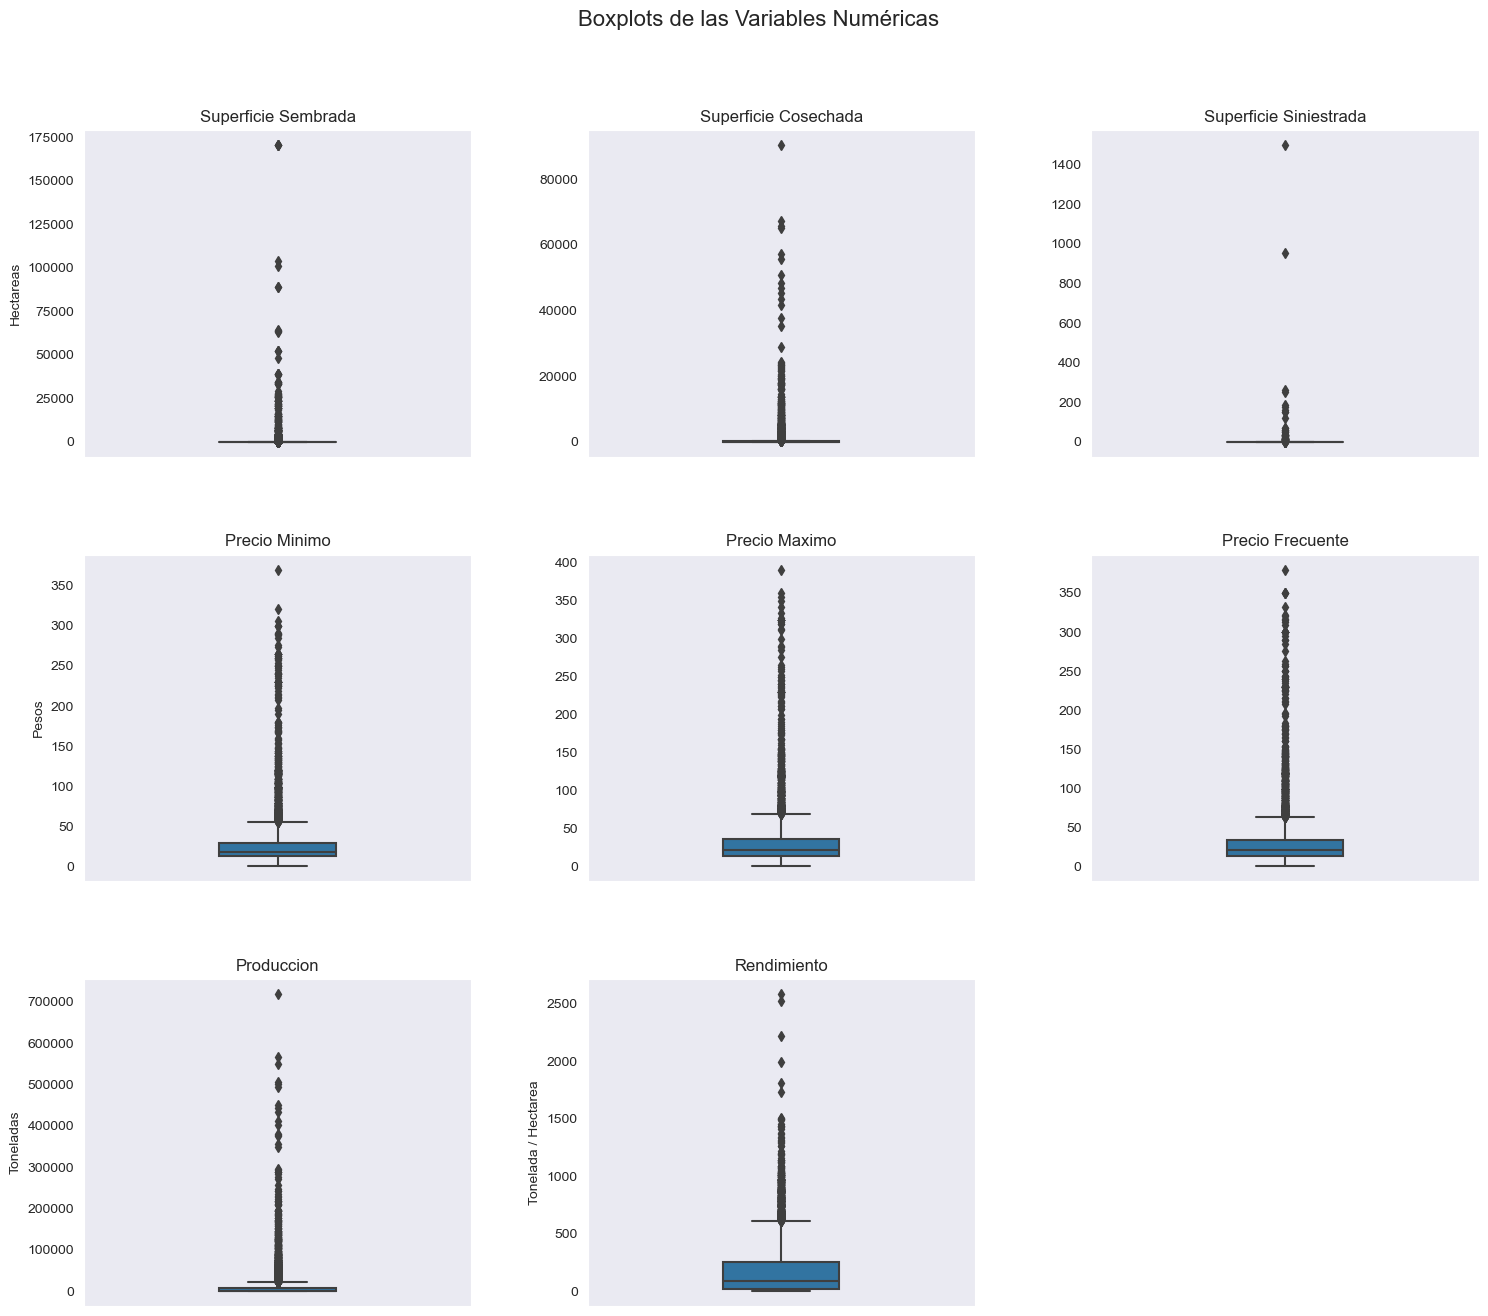

In [37]:
# Fijamos estilo
sns.set_style("dark")

# Lista con re-ordenamiento de las variables numéricas
variables_numericas = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", 
                       "Precio Minimo", "Precio Maximo", "Precio Frecuente", "Produccion", "Rendimiento"]

# Configurar la figura y los subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
# Ajustar el espacio entre subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3, bottom=-0.1)

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear boxplots divididos por HeartDisease
for i, variable in enumerate(variables_numericas):
    sns.boxplot(data=df_merge, y=variable, ax=axes[i], width=0.3)
    axes[i].set_title(f'{variable}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar la subgráfica vacía 
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas', fontsize=16)

axes[0].set_ylabel('Hectareas')
axes[3].set_ylabel('Pesos')
axes[6].set_ylabel('Toneladas')
axes[7].set_ylabel('Tonelada / Hectarea')

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Mostrar la figura
plt.show()

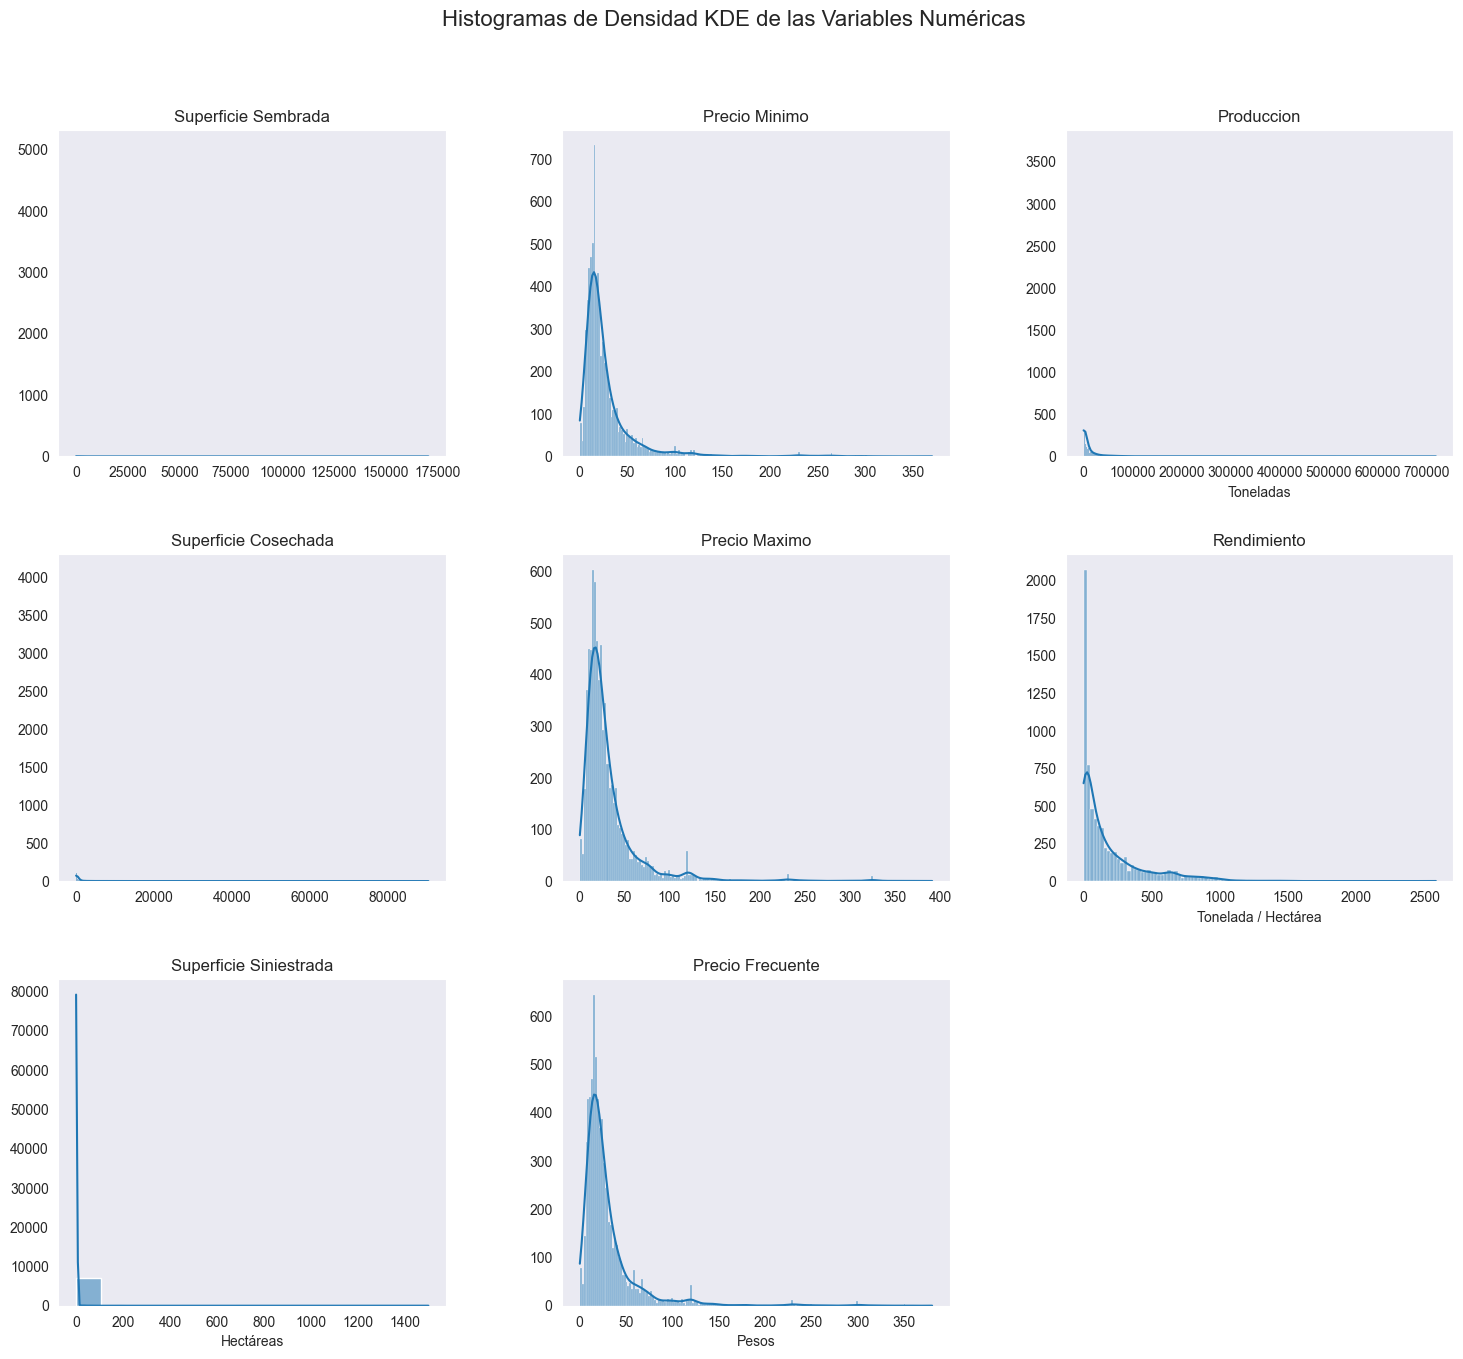

In [38]:
# Lista con re-ordenamiento de las variables numéricas
variables_numericas = ["Superficie Sembrada", 
                       "Precio Minimo", "Produccion", "Superficie Cosechada", "Precio Maximo", "Rendimiento", "Superficie Siniestrada", "Precio Frecuente"]

# Configurar la figura y los subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
# Ajustar el espacio entre subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3, bottom=-0.1)

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear histogramas de densidad kde
for i, variable in enumerate(variables_numericas):
    sns.histplot(data=df_merge, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'{variable}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Histogramas de Densidad KDE de las Variables Numéricas', fontsize=16)

axes[2].set_xlabel('Toneladas')
axes[5].set_xlabel('Tonelada / Hectárea')
axes[6].set_xlabel('Hectáreas')
axes[7].set_xlabel('Pesos')

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Mostrar la figura
plt.show()


##### Método Local Factor Outlier

In [38]:
# Crear modelo 
clf = LocalOutlierFactor(n_neighbors=20)

# Quitar columnas cualitativas 
X = df_merge.drop(columns=['Año', 'Entidad', 'Mes', 'Cultivo'])

# Buscar outliers
estimado_LOF = clf.fit_predict(X)

# Contar y mostrar resultados
cantidad_outliers_LOF = abs(estimado_LOF[estimado_LOF==-1].sum())
porcentaje_outliers_LOF = cantidad_outliers_LOF / len(df_merge) * 100

print(f"Cantidad de outliers: {cantidad_outliers_LOF}")
print(f"Porcentaje con respecto al total de datos: {porcentaje_outliers_LOF:.2f}%")

Cantidad de outliers: 787
Porcentaje con respecto al total de datos: 11.16%


Inspeccionamos algunos datos outlier según Local Factor Outlier

In [39]:
# Obtener datos outlier según LOF
outliers_LOF = df_merge[(estimado_LOF==-1)]

# Inspeccionar muestras de outliers
outliers_LOF.sample(n=20)

Año         Mes              Entidad                 Cultivo  \
2653  2021     Febrero              Jalisco                Coliflor   
5244  2022      Agosto             Veracruz                   Mango   
248   2020     Febrero               Sonora                    Nuez   
4431  2022       Junio           Guanajuato                 Cebolla   
6324  2023       Abril              Jalisco                    Piña   
3628  2021       Enero              Tabasco        Toronja (pomelo)   
936   2020   Diciembre              Jalisco  Tomate rojo (jitomate)   
466   2020       Abril      Baja California               Nopalitos   
2899  2021       Junio            Michoacán                Coliflor   
1263  2020     Octubre            Zacatecas                 Durazno   
2519  2021       Enero     Ciudad de México               Zarzamora   
5487  2022       Enero           Nuevo León        Toronja (pomelo)   
4481  2022       Marzo              Jalisco              Calabacita   
6567  2023      Agosto               Puebla                    Pera   
4312  2022  Septiembre     Ciudad de México             Chile verde   
5780  2023      Agosto               Sonora             Chile verde   
3952  2022      Agosto               Sonora             Chile verde   
6578  2023        Mayo            Querétaro                Coliflor   
236   2020  Septiembre               Sonora             Chile verde   
3710  2022       Enero  Baja California Sur               Nopalitos   

      Superficie Sembrada  Superficie Cosechada  Superficie Siniestrada  \
2653                 5.00                  0.00                     0.0   
5244                 0.00                704.90                     0.0   
248                  0.00                  0.00                     0.0   
4431              1146.00                424.00                     0.0   
6324                 0.00                  0.00                     0.0   
3628               110.00                110.00                     0.0   
936                  0.00                  1.50                     0.0   
466                  0.00                  1.50                     0.0   
2899                13.00                  0.00                     0.0   
1263                 0.00                829.00                     0.0   
2519                 4.57                  0.00                     0.0   
5487              2091.00               1660.00                     0.0   
4481               207.50                 96.00                     0.0   
6567                 0.00               1345.78                     0.0   
4312                 0.00                  1.00                     0.0   
5780               429.00                 16.33                     0.0   
3952               135.00                  0.00                     0.0   
6578                26.00                  0.00                     0.0   
236                394.00                 20.20                     0.0   
3710                21.50                  4.00                     0.0   

      Produccion  Rendimiento  Precio Minimo  Precio Maximo  Precio Frecuente  
2653        0.00         0.00      23.189310      25.999310         25.295172  
5244     2961.70       378.50      20.000000      25.000000         24.695652  
248         0.00         0.00      90.000000     110.000000        110.000000  
4431    15557.32       833.82      25.961818      30.250455         29.643636  
6324        0.00         0.00      18.083333      33.388889         33.388889  
3628       45.10         0.41       7.536500       7.536500          7.536500  
936     46284.45      2582.00      28.675000      29.525000         29.525000  
466        10.06         6.71      11.363000      12.763000         11.363000  
2899        0.00       109.45      16.318182      20.272727         17.954545  
1263     2231.48        94.15      53.178182      54.315455         53.291818  
2519        0.00         0.00      28.437500      31.718750

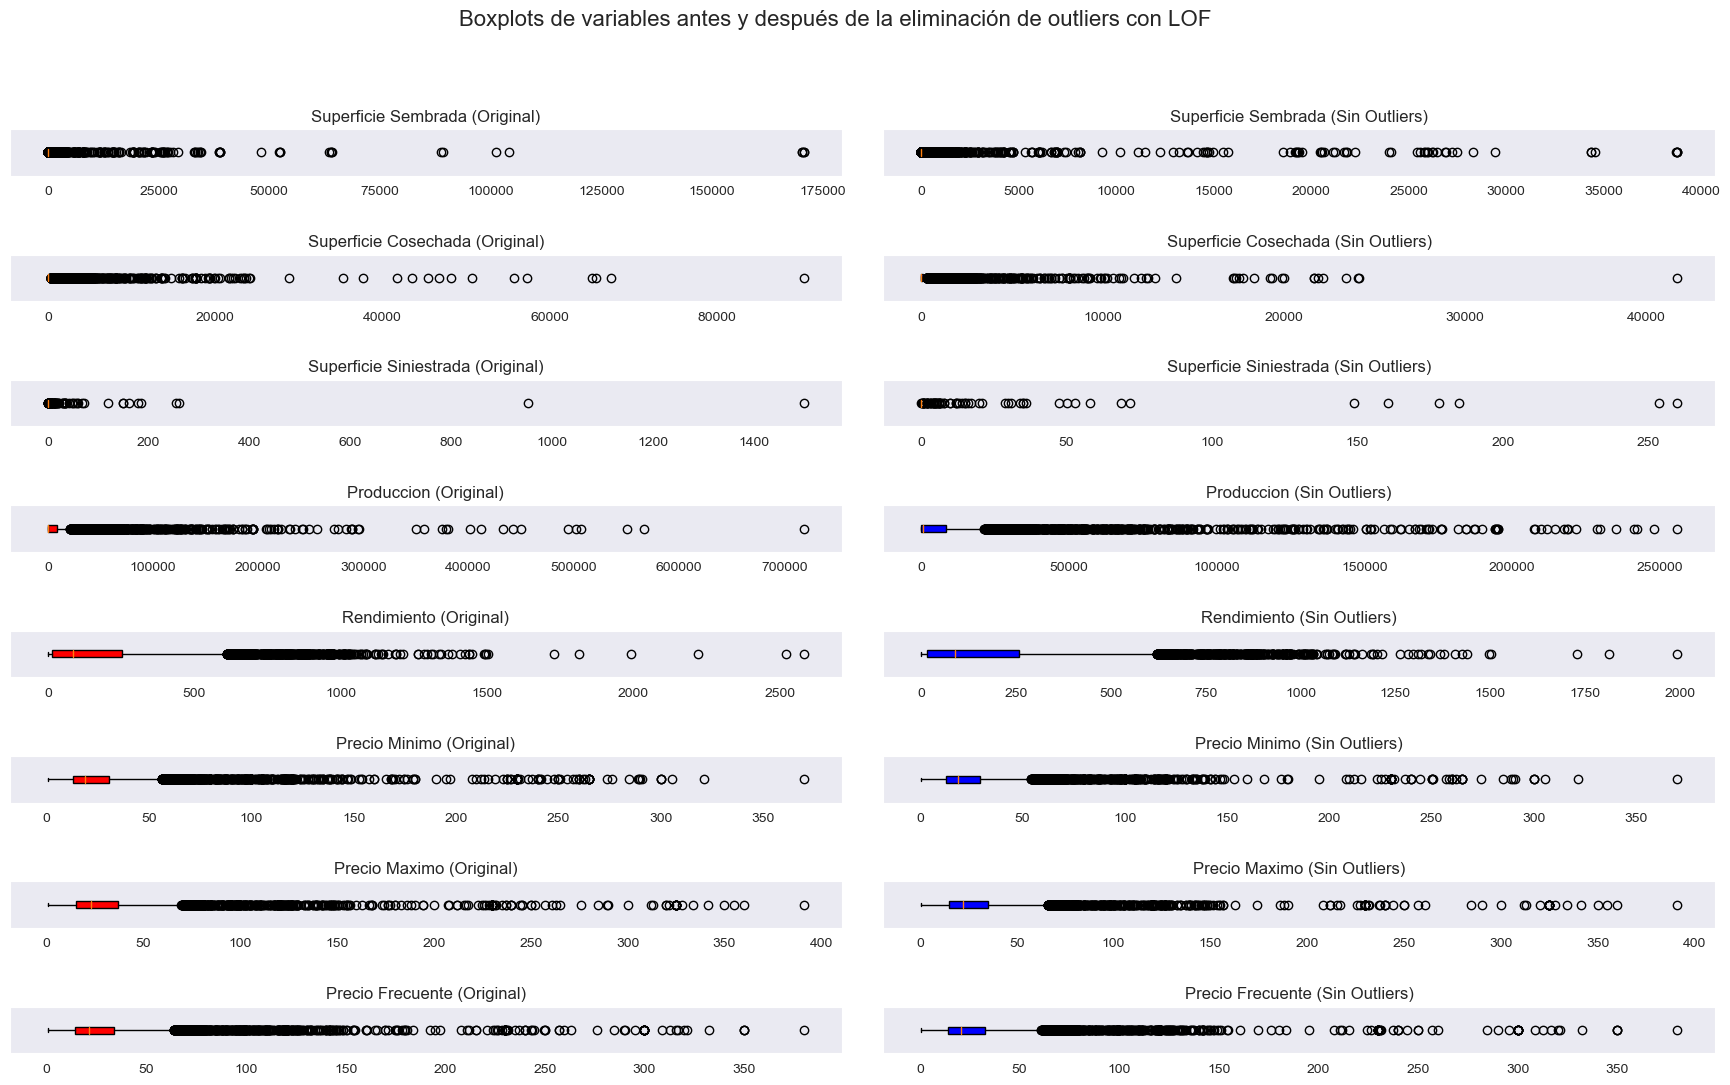

In [40]:
# Eliminar outliers del DataFrame
df_clean_LOF = df_merge[~(estimado_LOF==-1)]

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(22, 12))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, variable in enumerate(VARIABLES_NUMERICAS):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df_merge[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{variable} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean_LOF[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{variable} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Agregar un título general a la figura
fig.suptitle('Boxplots de variables antes y después de la eliminación de outliers con LOF', fontsize=16)

# Ajustar el espaciado entre subplots verticalmente
plt.subplots_adjust(hspace=1.7, wspace=0.05)

# Mostrar la figura
plt.show()

##### Método Isolation Forest

In [41]:
# Crear modelo Isolation Forest
random_state = np.random.RandomState(42)
clf = IsolationForest(n_estimators=100,max_samples='auto',random_state=random_state)  # Puedes ajustar el parámetro de contaminación según tus necesidades

# Quitar columnas cualitativas
X = df_merge.drop(columns=['Año', 'Entidad', 'Mes', 'Cultivo'])

# Entrenar el modelo y predecir outliers
estimado_IF = clf.fit_predict(X)

# Contar y mostrar resultados
cantidad_outliers_IF = len(estimado_IF[estimado_IF == -1])
porcentaje_outliers_IF = cantidad_outliers_IF / len(df_merge) * 100

print(f"Cantidad de outliers: {cantidad_outliers_IF}")
print(f"Porcentaje con respecto al total de datos: {porcentaje_outliers_IF:.2f}%")


Cantidad de outliers: 495
Porcentaje con respecto al total de datos: 7.02%


Inspeccionamos algunos datos outlier según Isolation Forest

In [42]:
# Obtener datos outlier según IF
outliers_IF = df_merge[(estimado_IF==-1)]

# Inspeccionar muestras de outliers
outliers_IF.sample(n=20)

Año         Mes     Entidad      Cultivo  Superficie Sembrada  \
6475  2023       Junio   Michoacán       Papaya                 0.00   
3563  2021   Noviembre   Chihuahua         Nuez                 0.00   
1507  2020       Abril    Veracruz      Naranja                 0.00   
3955  2022   Noviembre      Sonora  Chile verde                 0.00   
2115  2021       Enero     Yucatán      Naranja             14450.71   
3970  2022   Noviembre      Sonora         Nuez                 0.00   
6953  2023       Marzo   Chihuahua         Nuez                 0.00   
2942  2021       Enero   Michoacán        Mango             26224.43   
6886  2023       Enero     Chiapas        Mango             38781.85   
5230  2022       Junio    Veracruz        Limón                 0.00   
6488  2023       Enero   Michoacán    Zarzamora              9661.20   
5250  2022        Mayo    Veracruz      Naranja                 0.00   
6451  2023  Septiembre   Michoacán        Limón                 0.00   
6687  2023       Enero      Colima        Limón             21832.04   
3336  2021       Enero      Oaxaca        Limón             22272.40   
3559  2021       Julio   Chihuahua         Nuez                 0.00   
5398  2022  Septiembre   Chihuahua         Nuez                 0.00   
1414  2020       Enero    Guerrero        Mango             26940.50   
2579  2021       Julio  Guanajuato        Fresa                 0.00   
5672  2023       Enero     Nayarit          Uva               122.00   

      Superficie Cosechada  Superficie Siniestrada  Produccion  Rendimiento  \
6475                  0.00                     0.0    10703.82       363.22   
3563              43508.95                     0.0    52792.12        40.68   
1507               1429.35                     0.0   412008.86       585.52   
3955                876.00                     8.0    44272.50       646.60   
2115                740.01                     0.0      405.28         8.77   
3970               8081.00                     0.0     7797.85        59.12   
6953                  0.00                     0.0        0.00         0.00   
2942                635.00                     0.0      273.00         1.96   
6886              24180.89                     0.0    31510.25        10.16   
5230               5529.60                     0.0    83843.69       801.18   
6488               3923.79                     0.0    18280.16       133.97   
5250               7378.60                     0.0   187039.46       904.56   
6451                  0.00                     0.0   106046.89       272.49   
6687              21661.31                     0.0    24196.58         9.61   
3336              18350.75                     0.0    23560.98        22.29   
3559                  0.00                    34.0        0.00         0.00   
5398                  0.00                     0.0        0.00         0.00   
1414               3659.00                     0.0    17130.20       121.66   
2579                  0.00                     0.0     6143.89       672.47   
5672                  0.00                     0.0        0.00         0.00   

      Precio Minimo  Precio Maximo  Precio Frecuente  
6475     223.181818     225.636364        224.181818  
3563     263.000000     263.000000        263.000000  
1507      15.619333      17.809333         16.711000  
3955     124.150000     129.150000        127.300000  
2115       1.906250       1.987500          1.908750  
3970     100.000000     120.000000        109.750000  
6953     265.000000     325.000000        300.000000  
2942      16.250000      22.000000         22.000000  
6886      69.344930      74.184648         70.751831  
5230      51.136364      66.704545         54.809091  
6488      50.000000      62.500000         62.500000  
5250      17.120833      18.357143         17.560119  
6451      67.505873      76.481429         71.981111  
6687      78.568636     115.856364         82.759318  
3336     

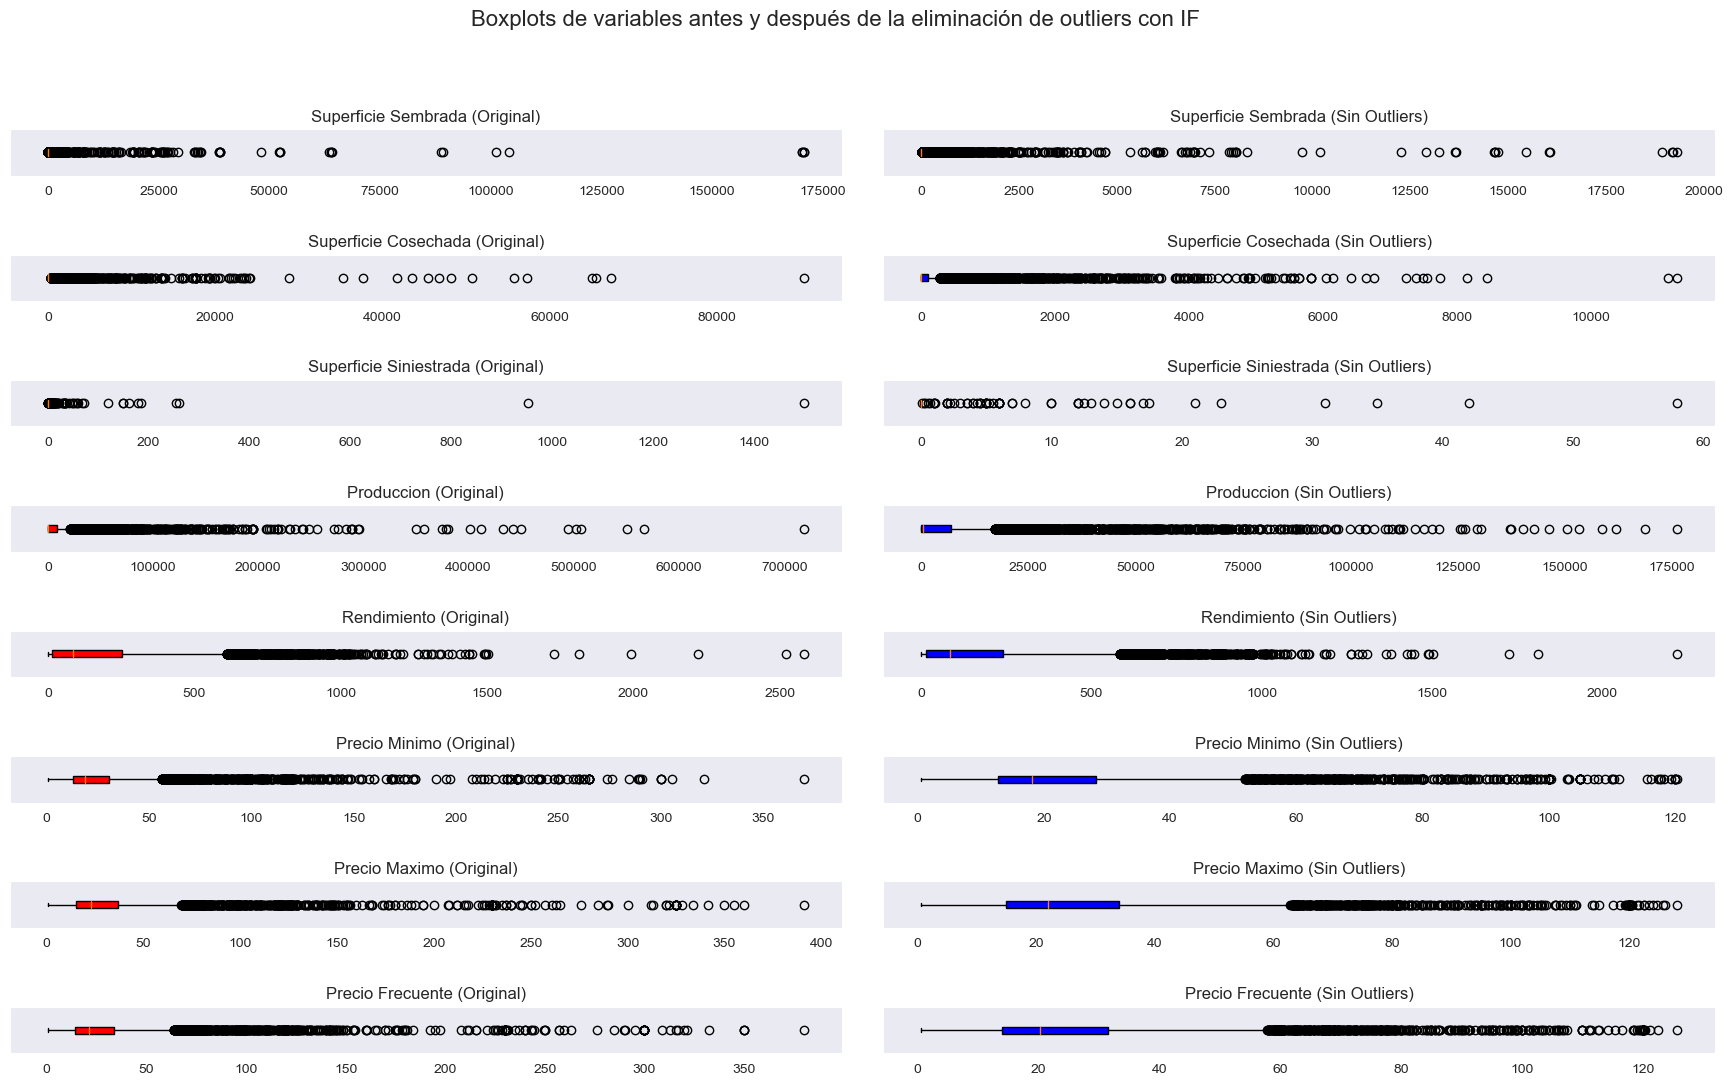

In [43]:
# Eliminar outliers del DataFrame
df_clean_IF = df_merge[~(estimado_IF==-1)]

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(22, 12))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, variable in enumerate(VARIABLES_NUMERICAS):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df_merge[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{variable} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean_IF[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{variable} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Agregar un título general a la figura
fig.suptitle('Boxplots de variables antes y después de la eliminación de outliers con IF', fontsize=16)

# Ajustar el espaciado entre subplots verticalmente
plt.subplots_adjust(hspace=1.7, wspace=0.05)

# Mostrar la figura
plt.show()

En ambos casos, la inspección de los outliers putativos no nos permite identificarlos como verdaderamente valores atípicos.Es normal que ciertos cultivos, como la nuez, se mantengan con precios muy por encima de otros cultivos. Además, es esperable que en ciertas épocas, la producción de ciertos cultivos incremente de manera significativa. Por esto y otros factores, decidimos conservar los outliers putativos y continuar el EDA con el DataFrame completo.  

## Relaciones entre variables por visualización

In [44]:
# Magic command para hacer gráficas interactivas
#%matplotlib widget

### Análisis temporal: ¿En qué épocas del año es más probable que se generen excedentes? 

Analizamos la evolución de las variables númericas a lo largo de los años, para cada uno de los cultivos de interés. Para esto, vamos a ignorar la información geográfica, promediando los valores a lo largo de todos los estados.

In [45]:
# Promediamos por año, mes y cultivo
df_año_mes_cult = df_merge.groupby(['Año', 'Mes', 'Cultivo'])[VARIABLES_NUMERICAS].mean().reset_index()

# Ordenamos el DataFrame con base en el orden cronológico de los meses
df_año_mes_cult['Mes'] = pd.Categorical(df_año_mes_cult['Mes'], categories=MESES_CRONOLOGICO, ordered=True)  # Convertir 'Mes' en una categoría con el orden cronológico
df_año_mes_cult = df_año_mes_cult.sort_values(by='Mes')  # Ordenar DataFrame con base en la columna 'Mes'

In [46]:
# Función para obtener la etiqueta del eje y según el tipo de variable
def get_label(variable):
    if variable in ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada']:
        return 'Hectáreas'
    elif variable in ['Precio Minimo', 'Precio Maximo', 'Precio Frecuente']:
        return 'Pesos'
    elif variable == 'Produccion':
        return 'Toneladas'
    elif variable == 'Rendimiento':
        return 'Tonelada/Hectárea'
    else:
        return ''

In [47]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_año_mes_cult, palette=COLORES, ci=False, estimator='mean')
        title = f'{variable} Promedio de Todos los Cultivos por Mes y Año'
    else:
        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo], palette=COLORES, ci=False)
        title = f'{variable} de {cultivo} por Mes y Año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable)>

Para facilitar el análisis comparativo entre los distintos años, repetimos la gráfica pero ahora de manera acumulada. Esto no solo facilita comparar los patrones de evolución a lo largo de cada año, sino que permite comparar los valores totales de cada año simplemente inspeccionando el mes de Diciembre. 

In [48]:
# Función para actualizar el gráfico acumulado según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar la producción acumulada promedio de todos los cultivos
        df_plot = df_año_mes_cult.groupby(['Año', 'Mes'])[variable].mean().groupby('Año').cumsum().reset_index()
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_plot, palette=COLORES, ci=False)
        title = f'{variable} Acumulado Promedio de Todos los Cultivos por Mes y Año'
    else:
        # Graficar la producción acumulada del cultivo seleccionado
        df_plot = df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo].groupby(['Año', 'Mes'])[variable].mean().groupby('Año').cumsum().reset_index()
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_plot, palette=COLORES, ci=False)
        title = f'{variable} Acumulado de {cultivo} por Mes y Año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')
    
    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + list(df_año_mes_cult['Cultivo'].unique())

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Zarzamora', 'Papa', 'Pap…

<function __main__.update_plot(cultivo, variable)>

Habiendo analizado el patrón de evolución a lo largo de los meses de los distintos años, procedemos a identificar cuáles son, en promedio, los meses con mejores métricas.

In [49]:
# Promediar los valores entre todos los años
df_promedio_anual = df_año_mes_cult.groupby('Mes')[VARIABLES_NUMERICAS].mean().reset_index()

# Función para actualizar el gráfico de barras horizontales según la variable y el cultivo seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar barras horizontales para el promedio de todos los cultivos
        order = df_promedio_anual.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=df_promedio_anual, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para todos los cultivos por mes'
    else:
        # Filtrar datos por cultivo
        df_cultivo = df_año_mes_cult[df_año_mes_cult['Cultivo'] == cultivo]

        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = df_cultivo.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=df_cultivo, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para {cultivo} por Mes'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Mes')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_con_todos = ['Todos los cultivos'] + df_año_mes_cult['Cultivo'].unique().tolist()

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_con_todos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Zarzamora', 'Papa', 'Pap…

<function __main__.update_plot(cultivo, variable)>

Procedemos a analizar la evolución de las distintas variables numéricas pero ahora a lo largo de todo el periodo del que se tienen datos. Prestamos especial interés a los meses identificados con mejores y peores métricas.

In [50]:
# Creamos una copia de nuestro DataFrame
df_merge_fechas = df_merge.copy()

# Asegúrate de tener las columnas Año y Mes en formato string
df_merge_fechas['Año'] = df_merge_fechas['Año'].astype(str)
df_merge_fechas['Mes'] = df_merge_fechas['Mes'].astype(str)

# Mapea los nombres de los meses a números
meses_dict = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df_merge_fechas['Mes'] = df_merge_fechas['Mes'].map(meses_dict)

# Combina las columnas Año y Mes en una nueva columna 'Fecha'
df_merge_fechas['Fecha'] = pd.to_datetime(df_merge_fechas['Año'] + '-' + df_merge_fechas['Mes'].astype(str), format='%Y-%m')

# Agrupa por mes y año y calcula el promedio de las columnas numéricas
df_grouped = df_merge_fechas.groupby(['Fecha', 'Cultivo'])[VARIABLES_NUMERICAS].mean().reset_index()

# Filtra los datos para el rango de fechas que deseas
start_date = '2019-12-25'
end_date = '2023-09-10'
df_filtered = df_grouped[(df_grouped['Fecha'] >= start_date) & (df_grouped['Fecha'] <= end_date)]

In [51]:
# Función para graficar
def plot_graph(cultivo, variable):
    plt.subplots(1, 1, figsize=(12, 8))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable para todos los cultivos
        df_all_cultivos_var1 = df_filtered.groupby('Fecha')[variable].mean().reset_index()
        plt.plot(df_all_cultivos_var1['Fecha'], df_all_cultivos_var1[variable], marker='o', linestyle='-', color='b', label=variable)

        # Añadir título
        plt.title(f'{variable} de todos los cultivos', pad=30, fontsize=16, fontweight='bold', va='center')

    else:
        # Filtra por el cultivo seleccionado
        df_cultivo = df_filtered[df_filtered['Cultivo'] == cultivo]
        
        # Grafica el promedio de la variable1 para el cultivo seleccionado
        plt.plot(df_cultivo['Fecha'], df_cultivo[variable], marker='o', linestyle='-', color='b', label=variable)
        
        # Añadir título
        plt.title(f'{variable} de {cultivo}', pad=30)

    # Etiquetas para el eje y
    plt.ylabel(get_label(variable), labelpad=20)

    plt.xlabel('Fecha', labelpad=20)
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
        
    plt.show()

# Añadir opción "Todos los cultivos" al widget de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable=widgets.Dropdown(options=variables_numericas, value='Superficie Sembrada', description='Variable'))

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable)>

Podemos inspeccionar simultaneamente la evolución de las distintas parejas de variables numéricas en busca de alguna relación significativa.

In [52]:
# Función para graficar
def plot_graph(cultivo, variable1, variable2):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable1 para todos los cultivos
        df_all_cultivos_var1 = df_filtered.groupby('Fecha')[variable1].mean().reset_index()
        axs[0].plot(df_all_cultivos_var1['Fecha'], df_all_cultivos_var1[variable1], marker='o', linestyle='-', color='b', label=variable1)
        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para todos los cultivos
        df_all_cultivos_var2 = df_filtered.groupby('Fecha')[variable2].mean().reset_index()
        axs[1].plot(df_all_cultivos_var2['Fecha'], df_all_cultivos_var2[variable2], marker='o', linestyle='-', color='r', label=variable2)
        axs[1].legend(loc='upper right')
        
        # Calcular la correlación
        corr_value = df_all_cultivos_var1[variable1].corr(df_all_cultivos_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.505, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=18, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    else:
        # Filtra por el cultivo seleccionado
        df_cultivo = df_filtered[df_filtered['Cultivo'] == cultivo]
        
        # Grafica el promedio de la variable1 para el cultivo seleccionado
        axs[0].plot(df_cultivo['Fecha'], df_cultivo[variable1], marker='o', linestyle='-', color='b', label=variable1)
        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para el cultivo seleccionado
        axs[1].plot(df_cultivo['Fecha'], df_cultivo[variable2], marker='o', linestyle='-', color='r', label=variable2)
        axs[1].legend(loc='upper right')

        # Calcular la correlación
        corr_value = df_cultivo[variable1].corr(df_cultivo[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.515, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=14, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    # Etiquetas para el eje y
    axs[0].set_ylabel(get_label(variable1))
    axs[1].set_ylabel(get_label(variable2))

    plt.xlabel('Fecha')
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
        
    plt.show()

# ... (código para obtener opciones de widgets)

# Añadir opción "Todos los cultivos" al widget de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable1=widgets.Dropdown(options=variables_numericas, value='Superficie Sembrada', description='Variable 1'),
         variable2=widgets.Dropdown(options=variables_numericas, value='Superficie Cosechada', description='Variable 2'))

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable1, variable2)>

### Análisis geográfico: ¿En qué ubicaciones es más probable que se generen excedentes? 

In [53]:
import geopandas
geo_df = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

ModuleNotFoundError: No module named 'geopandas'

In [54]:
geo_df.plot()

NameError: name 'geo_df' is not defined

## Correlación entre variables

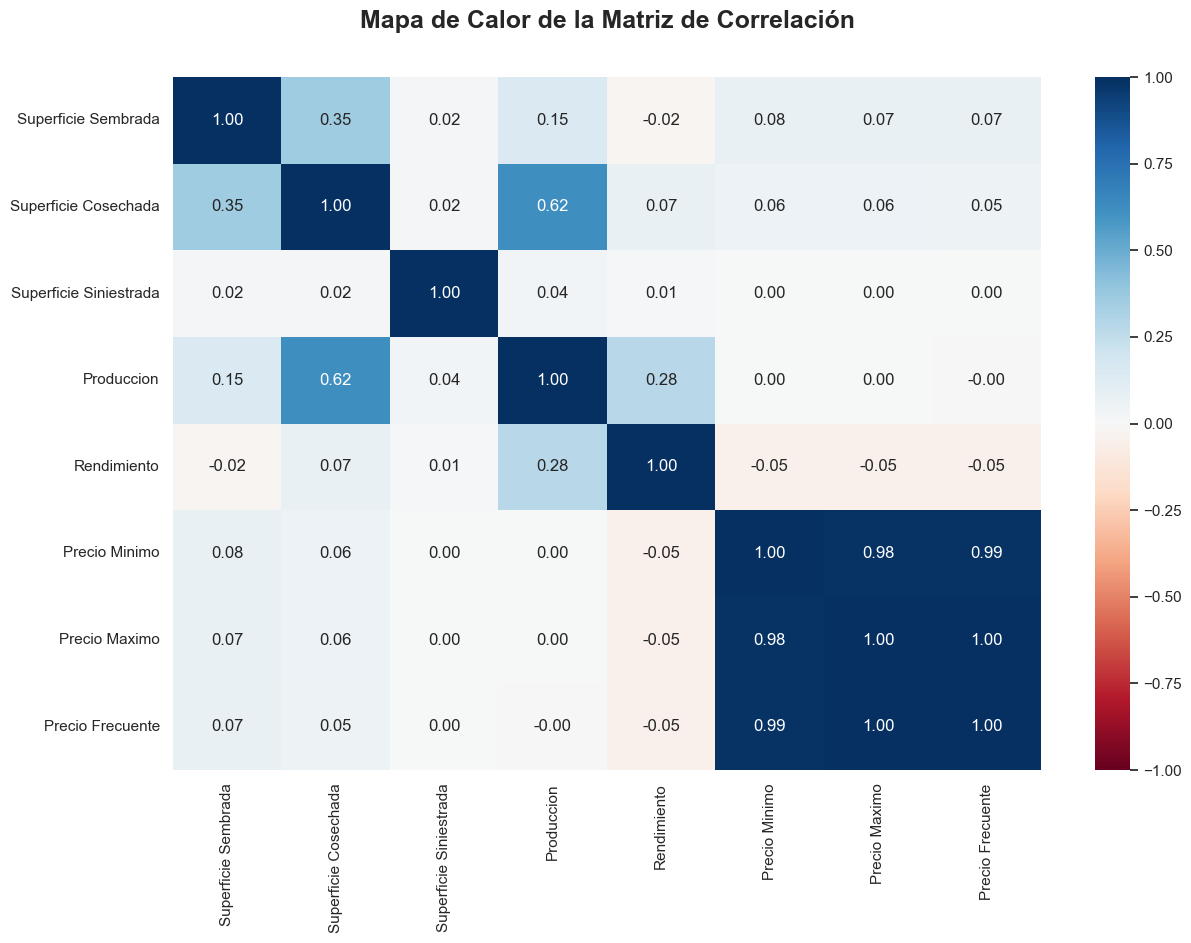

In [55]:
# Calcula la matriz de correlación
correlation_matrix = df_merge[VARIABLES_NUMERICAS].corr()

# Fijar estilo
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (14,9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación', pad=40, ha='center', va='center', fontsize=18, fontweight='bold')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#Mostrar gráfica
plt.show()
     

# Pandas Profiling

In [56]:
# Código para visualizar mejor los reportes en jupyter
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [57]:
# Código para obtener un super resumen automático de los datos

! pip install -U ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_siap, title="Pandas Profiling Report - SIAP")
profile.to_notebook_iframe()

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5a/14/a19d2266adf443d441be74d65e4ac12ba252c806ccf7ffdb59c7443bd846/ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/d7/10/ddfb9539a6e55f7dfd6c2b9b81d86fcba2761ba87eeb81f8b1012957dcdc/pydantic-2.5.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.6/174.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.3-cp311-cp311-macosx_11_0_arm64.whl (649 kB)
  Obtaining dependency information for multimethod<2,>=1.4 from https://files.pythonhosted.org/packages/7f/bd/750245e47e7f307d9f94d4fa84727f4ed9956005dfa671d58be1d531a0f6/multimethod-1.10-py3-none-any.whl.metadata
  Using cached multimethod

Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
Using cached multimethod-1.10-py3-none-any.whl (9.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.0 MB/s eta 0:00:0000:0100:01
Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.8
    Uninstalling pydantic-1.10.8:
      Successfully uninstalled pydantic-1.10.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.5.0 which is incompatible.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
#Exportamos el reporte a un archivo html que es guardado en la misma carpeta. 
profile.to_file('pandas-profiling-report')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]